In [28]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jonathanoheix_face_expression_recognition_dataset_path = kagglehub.dataset_download('jonathanoheix/face-expression-recognition-dataset')

print('Data source import complete.')


100%|██████████| 121M/121M [01:58<00:00, 1.07MB/s] 

Extracting files...


Data source import complete.


In [29]:
jonathanoheix_face_expression_recognition_dataset_path

'C:\\Users\\sinha\\.cache\\kagglehub\\datasets\\jonathanoheix\\face-expression-recognition-dataset\\versions\\1'

In [32]:
# !pip install kagglehub

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [30]:

# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(directory="C:\\Users\\sinha\\.cache\\kagglehub\\datasets\\jonathanoheix\\face-expression-recognition-dataset\\versions\\1/images/train",
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)
class_names = list(train_generator.class_indices.keys())

Found 28821 images belonging to 7 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


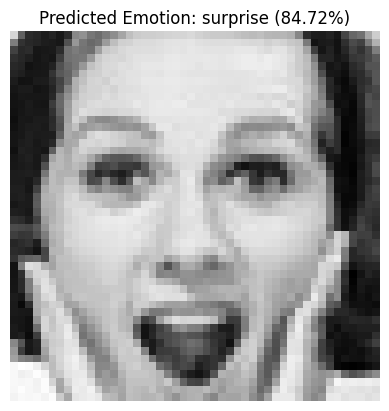

Emotion: surprise, Confidence: 84.72%


In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def detect_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence in %

    # Display the image with the predicted label and confidence
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Example Detection
predicted_emotion, confidence = detect_emotion('surprise.jpg')
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


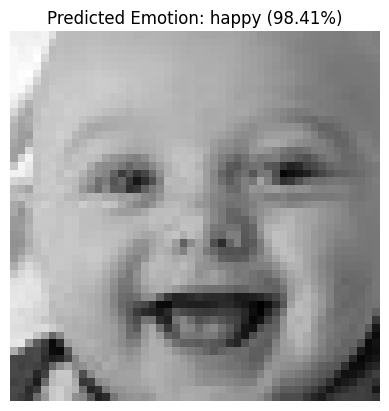

('happy', 98.41)


In [ ]:
print(detect_emotion('happy.jpg'))